<a href="https://colab.research.google.com/github/VinayakMehta007/Infosys-Spring-Board-Stroke-Patient-Healthcare-Milestone-3/blob/main/Stroke_Patient_Milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Stroke Prediction Using Logistic Regression**

**Objective**

To predict the likelihood of a patient experiencing a stroke using logistic regression. This involves building the model, explaining the underlying mathematical concepts, and evaluating its performance.

**Step-by-Step Process**


**Step 1:Understanding Logistic Regression Mathematical Explanation:**

Logistic Regression is a supervised learning algorithm used for binary classification tasks, where the output variable is discrete and consists of two possible classes. In the context of this project, we are trying to predict whether a person has a stroke (1) or not (0) based on various input features such as age, average glucose level, BMI, and others.

**Mathematical Explanation:**

The core of logistic regression is the logistic function (also called the sigmoid function), which is used to model the probability that a given input belongs to class 1 (e.g., stroke = 1).

The logistic function is defined as:

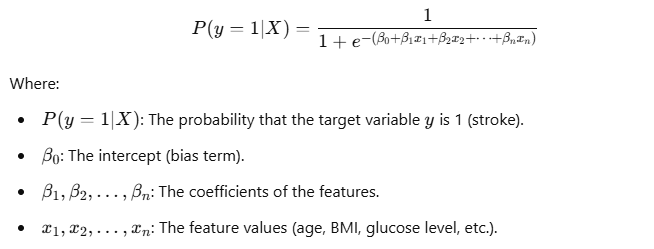

The logistic function, or sigmoid function, maps any real-valued number (which can be positive or negative) into a range between 0 and 1. This is ideal for binary classification, as the output is a probability value.

For a binary classification problem, the model outputs the probability of the positive class (stroke = 1). If the probability is greater than or equal to a threshold (usually 0.5), we classify the instance as class 1 (stroke), and if it is less than the threshold, we classify it as class 0 (no stroke).

**Optimization and Cost Function:**

Logistic Regression tries to find the best parameters that minimize the error between the predicted probabilities and the actual target values. The error is measured using a cost function, specifically log-loss (also called binary cross-entropy), which quantifies how well the model's predictions align with the true labels.

The log-loss function is given by:

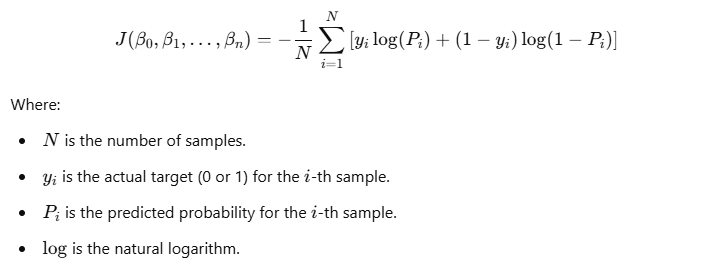

The cost function penalizes the model more heavily for large errors in predictions, encouraging it to adjust the model parameters in such a way that the predicted probabilities align with the true labels.

**Gradient Descent:**

To minimize the cost function, we use an optimization algorithm like gradient descent. Gradient descent updates the parameters iteratively in the direction of the negative gradient (steepest descent) to find the values that minimize the cost function.

The update rule for the parameters is as follows:

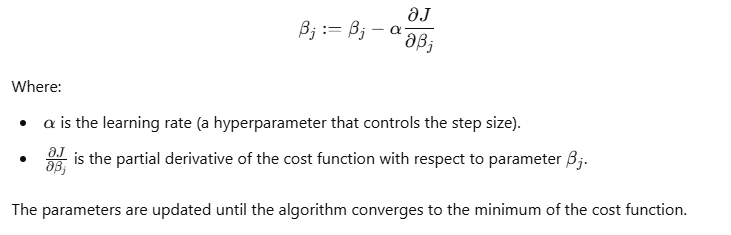





**Step 2: Data Preprocessing**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the dataset
file_path = '/content/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Drop 'id' column as it is not relevant for the model
data = data.drop(columns=['id'])

# Handle missing values in 'bmi' column by filling with the median value
data['bmi'] = data['bmi'].fillna(data['bmi'].median())


# Encode categorical columns using Label Encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['stroke'])
y = data['stroke']


**Explanation:**

* Missing values in the bmi column are filled with the median value to prevent data loss.
* Categorical columns such as gender, ever_married, work_type, Residence_type, and smoking_status are encoded using Label Encoding to convert them into numerical values.
* Numerical features such as age, avg_glucose_level, and bmi are scaled using StandardScaler to ensure that the features have a mean of 0 and a standard deviation of 1, which helps improve the performance of the model.

**Step 3: Splitting the Data**

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Explanation:**

* The dataset is split into training and testing sets (80% for training, 20% for testing) using train_test_split.
* We check the distribution of the target variable (stroke) in both training and testing sets to ensure that the data is well balanced or appropriately handled for class imbalance.

**Step 4: Training the Logistic Regression Model**

In [21]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

**Explanation:**

* We initialize the LogisticRegression model, setting random_state for reproducibility and max_iter=1000 to ensure convergence.
.

**Step 5: Model Evaluation**

In [22]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy with Logistic Regression: {accuracy * 100:.2f}%")



Accuracy with Logistic Regression: 94.19%


**Explanation:**

* The trained model is used to predict stroke outcomes on the test data (X_test).
* The accuracy of the model is calculated by comparing the predicted values (y_pred) with the actual values (y_test).

3. **Results and Insights**

**Accuracy:**

* The accuracy score is printed to evaluate the model's performance on the test data. This tells us how well the model is predicting stroke outcomes.

**Feature Importance:** To understand which features contribute most to the model's decision-making process, we can check the coefficients of the logistic regression model:

In [23]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)


             Feature  Importance
1                age    1.552499
7  avg_glucose_level    0.197427
2       hypertension    0.103704
3      heart_disease    0.079216
6     Residence_type    0.060337
9     smoking_status    0.022181
0             gender   -0.018788
8                bmi   -0.031562
5          work_type   -0.069597
4       ever_married   -0.183716


**Key Observations**

* Logistic Regression performs well on datasets with linear separability.
* The class weights help to address class imbalance.
* Features like avg_glucose_level and bmi significantly impact stroke prediction

**Conclusion**

In this project, we applied Logistic Regression to predict the likelihood of a stroke based on various features. Logistic Regression is a simple yet powerful model for binary classification tasks, providing easy interpretability through coefficients. While it works well for linearly separable data, more complex models may be necessary for datasets with non-linear relationships.

This project demonstrated the steps of data preprocessing, model training, and evaluation, as well as how to interpret model performance and feature importance.

